# Project Overview 

Research Questions:

1.Does the type of transaction (PAYMENT, TRANSFER, CASH_OUT, CASH_IN, DEBIT) affect the number of fraudulent transactions to the number of legitimate transactions?

2.Classify the transactions into low, medium or high amount transactions. Create bins for the same. Determine if there is a relationship between transaction amount and proportion of fraudulent transactions.

3.What's the distribution of the fraudulent transaction during 744 steps(hours)?

Comparison between logistic regression and k-means clustering:

1.Logistic regression

2.Machine learning method

3.Comparison

# Data Acquisition and Cleaning - Undersampling

In order to deal with the unbalanced data, we undersample it using the resample module from sklearn.utils. Then we divide the data into bins using qcut on the feature amount. We classify each amount into a low, medium, or high amount bin.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score


In [2]:
#import the dataset
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [3]:
#undersampling the dataset
y=df.isFraud
X=df.drop('isFraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=19)
X = pd.concat([X_train, y_train], axis=1)

fraud = X[X.isFraud==1]
notFraud = X[X.isFraud==0]
NFundersample = resample(notFraud,replace = False, n_samples = len(fraud),random_state = 19) 
underSample = pd.concat([NFundersample, fraud])
underSample.isFraud.value_counts()

1    6571
0    6571
Name: isFraud, dtype: int64

# Research Question 1 
Does the type of transaction (PAYMENT, TRANSFER, CASH_OUT, CASH_IN, DEBIT) affect the number of fraudulent transactions to the number of legitimate transactions?

In [4]:
#create dummy variables for marking fraudulent and not fraudulent transaction
dummies=pd.get_dummies(underSample['isFraud'],prefix='isFraud')
dummies

,isFraud_0,isFraud_1
5977425,1,0
6186910,1,0
2037241,1,0
4073097,1,0
707418,1,0
3833130,1,0
1745669,1,0
1113267,1,0
2991787,1,0
5323670,1,0


In [5]:
#concat dummies and column-'type'
underSample1=pd.concat([underSample['type'],dummies],axis=1)
underSample1

,type,isFraud_0,isFraud_1
5977425,CASH_OUT,1,0
6186910,PAYMENT,1,0
2037241,TRANSFER,1,0
4073097,CASH_IN,1,0
707418,CASH_OUT,1,0
3833130,CASH_OUT,1,0
1745669,PAYMENT,1,0
1113267,PAYMENT,1,0
2991787,CASH_OUT,1,0
5323670,CASH_OUT,1,0


In [6]:
#groupby column-'type' and sum the number of fraudulent and not fraudulent transaction
fk = underSample1.groupby('type').sum()
fk

,isFraud_0,isFraud_1
type,,
CASH_IN,1517.0,0.0
CASH_OUT,2256.0,3271.0
DEBIT,35.0,0.0
PAYMENT,2191.0,0.0
TRANSFER,572.0,3300.0


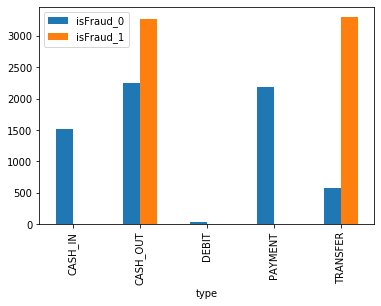

In [7]:
#visualization for fraudulent distribution in different payment types
fk[['isFraud_0','isFraud_1']].plot(kind='bar')

plt.show()

Fraudulent transactions only exist in two type of transaction, CASH_OUT and TRANSFER

# Research Question 2
Classify the transactions into low, medium or high amount transactions. Create bins for the same. Determine if there is a relationship between transaction amount and proportion of fraudulent transactions.

In [8]:
#set bins for transaction amount 
underSample['bins']=pd.qcut(underSample['amount'], q=3, precision=0, labels=['low','medium','high'])
underSample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium


In [9]:
#concat dummies and column-'bins'
new_underSample2=pd.concat([underSample['bins'],dummies],axis=1)
new_underSample2

,bins,isFraud_0,isFraud_1
5977425,medium,1,0
6186910,low,1,0
2037241,high,1,0
4073097,low,1,0
707418,medium,1,0
3833130,medium,1,0
1745669,low,1,0
1113267,low,1,0
2991787,medium,1,0
5323670,medium,1,0


In [10]:
#groupby bins and sum the number of fraudulent and not fraudulent transaction
gk = new_underSample2.groupby('bins').sum()
gk

,isFraud_0,isFraud_1
bins,,
low,3271.0,1111.0
medium,2580.0,1799.0
high,720.0,3661.0


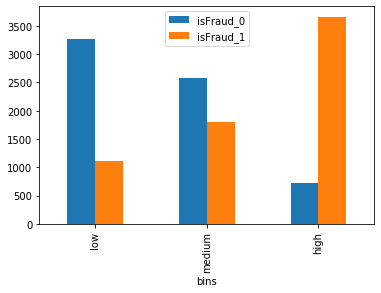

In [11]:
#visualization for fraudulent distribution in different transaction amount
gk[['isFraud_0','isFraud_1']].plot(kind='bar')

plt.show()

Higher amount of transaction tends to be fraudulent transaction.

# Research Question 3
What's the distribution of the fraudulent transaction during 744 steps(hours)?

In [12]:
#calculate the remainder of the column-'step' by dividing 24
underSample['step_24h']=underSample['step']%24
underSample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins,step_24h
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium,23
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low,17
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high,12
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low,12
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium,13
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium,18
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low,17
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low,10
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium,16
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium,14


In [13]:
#concat dummies and summed 24 steps
underSample3 = pd.concat([underSample['step_24h'],dummies],axis=1)
underSample3

,step_24h,isFraud_0,isFraud_1
5977425,23,1,0
6186910,17,1,0
2037241,12,1,0
4073097,12,1,0
707418,13,1,0
3833130,18,1,0
1745669,17,1,0
1113267,10,1,0
2991787,16,1,0
5323670,14,1,0


In [14]:
#groupby summed 24 steps and sum the number of fraudulent and not fraudulent transaction 
pk = underSample3.groupby('step_24h').sum()
pk

,isFraud_0,isFraud_1
step_24h,,
0,60.0,239.0
1,21.0,299.0
2,9.0,302.0
3,3.0,259.0
4,4.0,221.0
5,0.0,303.0
6,2.0,285.0
7,9.0,266.0
8,27.0,297.0


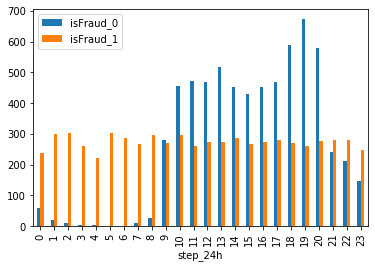

In [15]:
#visualization for fraudulent distribution during summed 24 steps.

pk[['isFraud_0','isFraud_1']].plot(kind='bar')

plt.show()

Legal transactions concentrate on half of a day, while fraudulent transactions are evenly distributed.

# Preparation for K-means Clustering and Logistic Regression

In [16]:
underSample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,bins,step_24h
5977425,407,CASH_OUT,181884.10,C1599479922,35270.00,0.00,C1039260789,7075510.96,7421915.08,0,0,medium,23
6186910,569,PAYMENT,1389.58,C482382055,45772.00,44382.42,M778775911,0.00,0.00,0,0,low,17
2037241,180,TRANSFER,1307300.66,C1963155061,0.00,0.00,C1108675046,9995279.07,11302579.73,0,0,high,12
4073097,300,CASH_IN,16032.64,C950571812,1199782.82,1215815.47,C2098154505,97322624.54,97306591.90,0,0,low,12
707418,37,CASH_OUT,110493.07,C448419293,0.00,0.00,C804475266,13816035.50,13926528.57,0,0,medium,13
3833130,282,CASH_OUT,166693.98,C1483794122,438893.91,272199.93,C339470009,10076440.72,10243134.71,0,0,medium,18
1745669,161,PAYMENT,5009.41,C365295710,25137.80,20128.39,M1459741747,0.00,0.00,0,0,low,17
1113267,130,PAYMENT,17063.57,C2097243366,0.00,0.00,M1762151612,0.00,0.00,0,0,low,10
2991787,232,CASH_OUT,174533.81,C1557577596,3049.00,0.00,C737040427,0.00,174533.81,0,0,medium,16
5323670,374,CASH_OUT,229545.30,C993819339,161503.00,0.00,C927276325,61576.20,291121.50,0,0,medium,14


In [17]:
#Create new columns for missing values
underSample['errorBalanceOrg'] = underSample['newbalanceOrig'] + underSample['amount'] - underSample['oldbalanceOrg']
underSample['errorBalanceDest'] = underSample['oldbalanceDest'] + underSample['amount'] - underSample['newbalanceDest']


In [18]:
#Drop five categorical columns - 'nameOrig', 'nameDest', 'isFlaggedFraud', 'bins' and 'type'
underSample_drop_column = underSample.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type','bins'], axis = 1)

In [19]:
#Drop three transaction type without fraudulent transaction - 'PAYMENT', 'CASH_IN' and 'DEBIT'.
underSample_drop_column_row=underSample[(underSample.type != 'PAYMENT') & (underSample.type != 'CASH_IN')& (underSample.type != 'DEBIT')]
underSample_drop_column_row=underSample_drop_column_row.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','type','bins'], axis = 1)

In [64]:
# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# k-means

In [61]:
def kmeans(df):
    # Split the data into train set and test set
    train,test = train_test_split(df,test_size=0.2,random_state=0)

    # Get the arrays of features and labels in train dataset
    features_train = train.drop(['isFraud'],axis=1)
    features_train = features_train.values
    labels_train = pd.DataFrame(train[['isFraud']])
    labels_train = labels_train.values

    # Get the arrays of features and labels in test dataset
    features_test = test.drop(['isFraud'],axis=1)
    features_test = features_test.values
    labels_test = pd.DataFrame(test[["isFraud"]])
    labels_test = labels_test.values

    # Normalize the features in both train and test dataset
    features_train = normalize(features_train)
    features_test = normalize(features_test)

    model = KMeans(n_clusters=2,random_state=0)
    model.fit(features_train)
    labels_train_predicted = model.predict(features_train)
    labels_test_predicted = model.predict(features_test)

    # Scoring kmeans
    print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
    print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
    print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
    print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))
    
    # Calculating confusion matrix for kmeans  
    undersample_cm = confusion_matrix(labels_test, labels_test_predicted)
    actual_cm = confusion_matrix(labels_test, labels_test)
    labels = ['No Fraud', 'Fraud']

    fig = plt.figure(figsize=(16,8))

    fig.add_subplot(223)
    plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Greens)

kmeans_precison_score: 0.5093773443360841
kmeans_recall_score: 0.5025906735751295
kmeans_accuracy_score: 0.49562571319893495
kmeans_f1_score: 0.5059612518628913
Confusion matrix, without normalization
[[624 654]
 [672 679]]


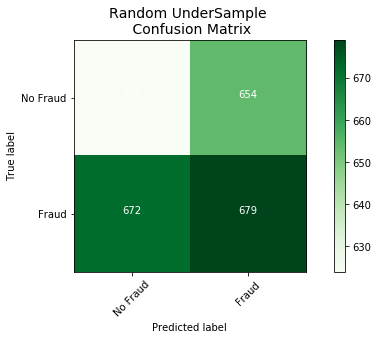

In [62]:
kmeans(underSample_drop_column)

kmeans_precison_score: 0.9807692307692307
kmeans_recall_score: 0.5041825095057034
kmeans_accuracy_score: 0.6462765957446809
kmeans_f1_score: 0.6659969864389754
Confusion matrix, without normalization
[[552  13]
 [652 663]]


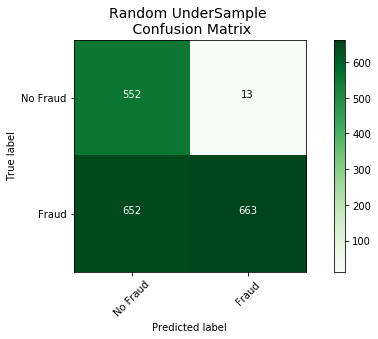

In [63]:
kmeans(underSample_drop_column_row)

# Logistic Regression

In [68]:
#create a function for logistic regression
def regression(df):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('isFraud',axis=1), 
               df['isFraud'], test_size=0.20, 
                random_state=101)
    #create an instance and fit the model 
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    #predictions
    Predictions = logmodel.predict(X_test)
    print(classification_report(y_test,Predictions))
    
    undersample_cm = confusion_matrix(y_test, Predictions)
    actual_cm = confusion_matrix(y_test, y_test)
    labels = ['No Fraud', 'Fraud']

    fig = plt.figure(figsize=(16,8))

    fig.add_subplot(221)
    plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)


/Users/ikuno/tools/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1308
           1       0.87      0.95      0.91      1321

    accuracy                           0.90      2629
   macro avg       0.90      0.90      0.90      2629
weighted avg       0.90      0.90      0.90      2629

Confusion matrix, without normalization
[[1113  195]
 [  67 1254]]


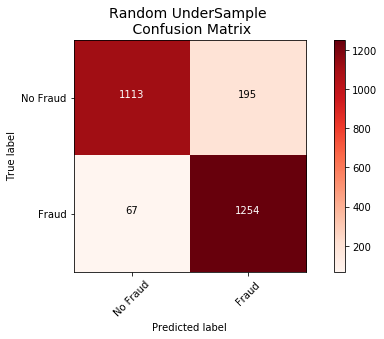

In [69]:
regression(underSample_drop_column)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       581
           1       0.94      0.99      0.96      1299

    accuracy                           0.95      1880
   macro avg       0.96      0.93      0.94      1880
weighted avg       0.95      0.95      0.95      1880

Confusion matrix, without normalization
[[ 506   75]
 [  18 1281]]


/Users/ikuno/tools/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


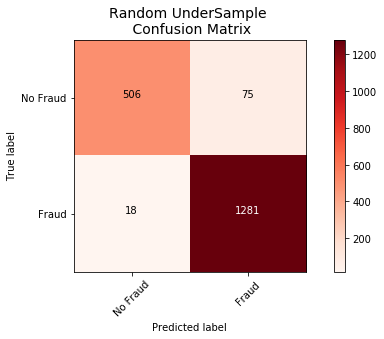

In [70]:
regression(underSample_drop_column_row)